Check envinroment

In [1]:
import sys
print sys.version

2.7.15rc1 (default, Nov 12 2018, 14:31:15) 
[GCC 7.3.0]


#Set up Colab

In [2]:
# install pydrive to load daa and script files 
!pip install pydrive

This notebook was prepared in Colab. To load data and python scripts in Colab, some additional steps are to be  performed. 
First, data archive and python scripts archive were uploaded in Google Drive and shared for public access.
Then files were downloaded to Colab from Google Drive by means of the link. At last, the uploaded archives were extracted.



In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import tarfile
import zipfile

In [0]:
# authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# load and exctract data files in Colab

# shared link to data archive file
# https://drive.google.com/open?id=1iqg3npFMm-7EeqDbZbwOHJbms01lAjbC 

download = drive.CreateFile({'id': '1iqg3npFMm-7EeqDbZbwOHJbms01lAjbC'})
download.GetContentFile('aclImdb_v1.tar.gz')

# unzip
if not os.path.exists('data'):
  os.makedirs("data")

tar = tarfile.open('aclImdb_v1.tar.gz', "r:gz")
tar.extractall('data/')
tar.close()

In [0]:
# load and extract python scripts

# shared link to script files
# https://drive.google.com/open?id=1CDNHqHBIToXXv8iUsDYNzmn-GI8eT5KG

download_scr = drive.CreateFile({'id': '1CDNHqHBIToXXv8iUsDYNzmn-GI8eT5KG'})
download_scr.GetContentFile('scripts.zip')

zip_ref = zipfile.ZipFile('scripts.zip', "r")
zip_ref.extractall()
zip_ref.close()

# Dataset description

The dataset, that is used to create the model, is a Large Movie Review Dataset v1.0. The dataset along with its description is available at http://ai.stanford.edu/~amaas/data/sentiment/



# Load data

Read raw text data.

In [0]:
import utils
from sklearn.model_selection import train_test_split

In [0]:
# load data

train_path = os.path.join("data", "aclImdb", "train")
test_path = os.path.join("data", "aclImdb", "test")

train = utils.loaddata(train_path)
test = utils.loaddata(test_path)

In [9]:
print train[1][0], train[0][0]
print train[1][12500], train[0][12500]

0 Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.
1 Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through 

Split train data into two subsets - train data and validation data in the proportion 70:30. We'll train models on the train subset and check model accuracy on the validation subset. Quality of the final model will be checked on test subset.

In [0]:
# split train set into train and validation 
train_data, val_data, train_target, val_target = train_test_split(train[0], train[1], shuffle=True, test_size=0.3, random_state=123)

test_data = test[0]
test_target = test[1]

In [11]:
train_data[0:3]

[u'I created my own reality by walking out of the theater I was roped in by my girlfriend into going to this dreck with her mom. We (my g-friend and I) walked out about an hour into it. What a load of pseudo scientific new age jargon.<br /><br />Sub atomic particles are thoughts? By taping labels to bottles of water and blessing it by a Buddhist monk it grew little pretty crystals? A drop of 25% in the murder rate in DC happened when a bunch of folks meditated. Wow, what a rigorous scientific study. I\'m sure that someone ate cheerios for four days straight during the same time. Should we conclude that eating cheerios caused a drop in the murder rate? <br /><br />Hogwash, hooey, bull pucky! <br /><br />BTW- It was funded by the Ramtha cult, the leader of which was one of the "experts" which were interview by the filmmakers. No ulterior motives here, right?',
 u'The most horrible retelling of a great series. It should not have been named Battlestar Galactica, because it\'s only the same

#Preprocess data

The following rules are applied during preprocessing:

1. characters are  converted to lowercase 
2. contracted forms are replaced with the corresponding full forms
3. some special characters like (), {}, !,, etc are replaced with space
4. characters that are not digits, letters, space, underscore or "#", "+" are removed
5. stopwords are removed.

To filter stopwords, stopwords corpus from nltk python package is used. Words 'no', 'nor', 'not' are assumed to be important for sentiment analysis and are excluded from the stopwords corpus.

Patterns to be replaced are defined with regular expressions. More details on the replacement rules can be found in "process.py" file.


In [12]:
from preprocess import TextPreprocessor

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
# preprocess data
prp = TextPreprocessor()

X_train_tok = [prp.clean_text(text) for text in train_data]
print('train subset is preprocessed')
X_val_tok = [prp.clean_text(text) for text in val_data]
print('validation subset is preprocessed')
X_test_tok = [prp.clean_text(text) for text in test_data]
print('test subset is preprocessed')

train subset is preprocessed
validation subset is preprocessed
test subset is preprocessed


In [14]:
# example of the preproccessed text
X_train_tok[0:3]

[u'created reality walking theater roped girlfriend going dreck mom g friend walked hour load pseudo scientific new age jargon sub atomic particles thoughts taping labels bottles water blessing buddhist monk grew little pretty crystals drop 25 murder rate dc happened bunch folks meditated wow rigorous scientific study sure someone ate cheerios four days straight time conclude eating cheerios caused drop murder rate hogwash hooey bull pucky btw funded ramtha cult leader one experts interview filmmakers no ulterior motives right',
 u'horrible retelling great series not named battlestar galactica name alone many changes changes characters turned male female black asian cylon way attract female audiences already strong female characters could made stronger gone egyptian feeling gone quest earth lack cylons go terminator rejects takes away film especially one made fembot granted original show lot cheese large following tried hold onto following give fans nothing work basically spit face mak

Let's check what is length of the review texts. We'll do calculations for the train dataset.

Mean  838.9772571428572
std  643.7283114992067


/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


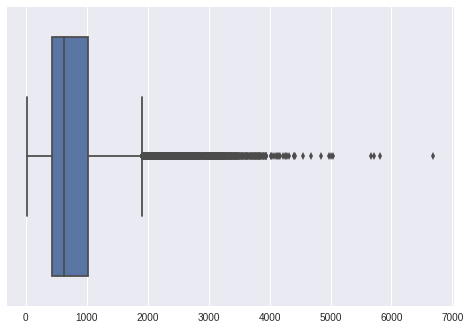

In [15]:
import seaborn as sns 
import numpy as np

review_len = [len(text) for text in X_train_tok]
print "Mean ", np.mean(review_len) 
print "std ", np.std(review_len)

sns.boxplot(review_len)

From the plot above it follows that the 75th percentile approximately equals to 1000. It means that 75% of lengths of review texts in X_train_tok set is below 1000. 

# Approach based on logistic regression

The idea is to create tf-idf features for documents (i.e reviews) and apply logistic regression algorithm to a matrix of tf-idf features. Instead of tf-idf, bag-of-words approach can be used to generate document features. Tf-idf approach was selected because usually it provides better results. 

When creating a matrix with tf-idf features for sentiment analysis, it is reasonable to take into account both 1-and 2- grams. Let's check number of ngrams and their frequency in the corpus:

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vect = CountVectorizer(ngram_range=(1, 2), max_df=0.9, min_df=5)
bag_of_words = cnt_vect.fit_transform(X_train_tok)

print "Total number of ngrams: ", bag_of_words.shape[1]

# ngrams in the corpus
sum_words = bag_of_words.toarray().sum(axis=0)

# ngrams and their frequencies in the corpus
ngrams_dict = {word: freq for word, freq in zip(cnt_vect.get_feature_names(), sum_words)}
# sort ngrams by the frequency in reverse order
ngrams_dict_sorted = sorted(ngrams_dict.items(), key=lambda x: x[1], reverse=True)

Total number of ngrams:  65821


In [17]:
N = 12000
ngrams_dict_sorted[N:][0:5]

[(u'gets better', 28),
 (u'cracker', 28),
 (u'tin', 28),
 (u'matter much', 28),
 (u'gusto', 28)]

Top of N=12000 ngrams has frequency higher than 30. Other ngrams are  less frequent.  It seems rather reasonable to preserve a top of N=12000 ngrams in the dictionary. 

Create tf-idf features :

In [0]:
from models import Model

m = Model()

In [19]:
%%time
# get tfidt features
X_train_tfidf_tok, tfidf_vect = m.tfidf_train(X_train_tok, ngram_range=(1,2), max_df=0.9, 
                                       min_df=5, max_features=12000)

CPU times: user 25.8 s, sys: 355 ms, total: 26.1 s
Wall time: 26.1 s


In [0]:
X_val_tfidf_tok = m.tfidf_trans(tfidf_vect, X_val_tok)
X_test_tfidf_tok = m.tfidf_trans(tfidf_vect, X_test_tok)

Fit LogisticRegression classifier

In [21]:
%%time
clf_regr_tok = m.log_regression_train(X_train_tfidf_tok, train_target)

CPU times: user 1.21 s, sys: 629 ms, total: 1.84 s
Wall time: 28.6 s


Check the classifier accuracy on validation set:

In [22]:
lr_acc_val, lr_cvs_val = m.check_acc(clf_regr_tok, X_val_tfidf_tok, val_target)

Mean accuracy:  0.8912
Cross validation score:  [0.868      0.86733333 0.88933333 0.87733333 0.88266667]


In [23]:
lr_acc_test, lr_cvs_test = m.check_acc(clf_regr_tok, X_test_tfidf_tok, test_target)

Mean accuracy:  0.87648
Cross validation score:  [0.8882 0.8792 0.8864 0.8848 0.8726]


Calculate confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix
lr_tn, lr_fp, lr_fn, lr_tp = confusion_matrix(val_target, m.pred_labeles(clf_regr_tok, X_val_tfidf_tok)).ravel()
print lr_tn, lr_fp, lr_fn, lr_tp

3249 456 360 3435


Save results of model evaluation in DataFrame

In [0]:
import pandas as pd
import numpy as np
models_acc = pd.DataFrame({'model_name': ["log_regr"], 
                           'acc_on_val': [lr_acc_val], \
                           'cross_val_score_mean_val': [np.mean(lr_cvs_val)], \
                           'acc_on_test': [lr_acc_test], 
                           'cross_val_score_mean_test': [np.mean(lr_cvs_test)],
                           'TN': lr_tn,
                           'FP': lr_fp,
                           'FN': lr_fn,
                           'TP': lr_tp})

In [26]:
models_acc

,FN,FP,TN,TP,acc_on_test,acc_on_val,cross_val_score_mean_test,cross_val_score_mean_val,model_name
0,360,456,3249,3435,0.87648,0.8912,0.88224,0.876933,log_regr


Other classifiers such as SVC, Random Forest, AdaBoost,  GradientBoostingClassifier were tested as well. They have lower accuracy. Tuning parameters of these classifiers require much time due to sparsity of feature matrix. Results of their evaluation are not listed here.

Upload the model files to Google Drive

In [0]:
from models import MODEL_PATH

def upload_to_GD(file_list):
  for file in file_list:
    upload = drive.CreateFile({'title': file})
    upload.SetContentFile(file)
    upload.Upload()

file_list = [MODEL_PATH["TFIDF_VECTORIZER"], MODEL_PATH["LOG_REGR_CLASSIFIER"]]
upload_to_GD(file_list)

# Sentiment analysis with Doc2Vec model

Doc2Vec is an algorithm to convert sentences / documents into numeric vectors. The idea is to get numeric representation of movie reviews and then apply a classification algorithm to the numeric vectors. Length of vectors is taken equal to 100.




In [0]:
from gensim.models.doc2vec import Doc2Vec
from doc2vec_model import Doc2Vec_Model, DOC2VEC_MODEL_PATH


d2v_model = Doc2Vec_Model()

In [29]:
%%time
# train and save doc2vec model
import multiprocessing
cores=multiprocessing.cpu_count()

d2v_model.doc2vec_train(X_train_tok, vec_size=100, max_epochs=10, workers=cores)

iteration 0
iteration 2
iteration 4
iteration 6
iteration 8
Model Saved
CPU times: user 21min 28s, sys: 34.3 s, total: 22min 3s
Wall time: 12min 8s


In [0]:
# load model
d2v = Doc2Vec.load(DOC2VEC_MODEL_PATH["DOC2VEC"])

In [31]:
%%time
# get numeric representation for documents from corpus
X_train_d2v = d2v_model.doc2vec_infer(d2v, X_train_tok)
X_val_d2v = d2v_model.doc2vec_infer(d2v, X_val_tok)
X_test_d2v = d2v_model.doc2vec_infer(d2v, X_test_tok)

CPU times: user 4min 6s, sys: 168 ms, total: 4min 6s
Wall time: 4min 6s


Train logistic regression on vector representation of the documents and evaluate the model

In [32]:
%%time
lr_d2v_tok = m.log_regression_train(X_train_d2v, train_target, model_file=MODEL_PATH["LOG_REGR_DOC2VEC_CLASSIFIER"])
d2v_acc_val, d2v_cvs_val = m.check_acc(lr_d2v_tok, X_val_d2v, val_target)

Mean accuracy:  0.8818666666666667
Cross validation score:  [0.868      0.874      0.87866667 0.894      0.89533333]
CPU times: user 2min, sys: 2.96 s, total: 2min 3s
Wall time: 3min 20s


In [33]:
d2v_acc_test, d2v_cvs_test = m.check_acc(lr_d2v_tok, X_test_d2v, test_target)

Mean accuracy:  0.87264
Cross validation score:  [0.8792 0.8818 0.8796 0.8732 0.8616]


Calculate confusion matrix

In [34]:
d2v_tn, d2v_fp, d2v_fn, d2v_tp = confusion_matrix(val_target, m.pred_labeles(lr_d2v_tok, X_val_d2v)).ravel()
print d2v_tn, d2v_fp, d2v_fn, d2v_tp

3281 424 462 3333


Save results of model evaluation

In [0]:
models_acc_d2 = pd.DataFrame({'model_name': ["d2v"], 
                              'acc_on_val': [d2v_acc_val], \
                              'cross_val_score_mean_val': [np.mean(d2v_cvs_val)], \
                              'acc_on_test': [d2v_acc_test], 
                              'cross_val_score_mean_test': [np.mean(d2v_cvs_test)],
                              'TN': d2v_tn,
                              'FP': d2v_fp,
                              'FN': d2v_fn,
                              'TP': d2v_tp})

In [36]:
models_acc = models_acc.append(models_acc_d2)
models_acc

,FN,FP,TN,TP,acc_on_test,acc_on_val,cross_val_score_mean_test,cross_val_score_mean_val,model_name
0,360,456,3249,3435,0.87648,0.891200,0.88224,0.876933,log_regr
0,462,424,3281,3333,0.87264,0.881867,0.87508,0.882000,d2v


Save the trained model on Google Drive

In [0]:
file_list = [DOC2VEC_MODEL_PATH["DOC2VEC"], MODEL_PATH["LOG_REGR_DOC2VEC_CLASSIFIER"]]
upload_to_GD(file_list)

#Sentiment analysis with TextBlob library

TextBlob library can generate *polarity* *score* for  a given text. Polarity score is a float within the range [-1;1]

In [0]:
from textblob import TextBlob

# get sentiment property for train, validation and test subsets
train_pol = np.asarray([TextBlob(text).sentiment[0] for text in X_train_tok]).reshape(-1, 1)
val_pol = np.asarray([TextBlob(text).sentiment[0] for text in X_val_tok]).reshape(-1, 1)
test_pol = np.asarray([TextBlob(text).sentiment[0] for text in X_test_tok]).reshape(-1, 1)

Apply logistic regression classifier to polarity scores to classify reviews. For classification a rule based on threshold can be applied. But I found that logistic classifier has better accuracy.

In [39]:
%%time
pol_clf = m.log_regression_train(train_pol, train_target, model_file=MODEL_PATH["LOG_REGR_POLARITY_CLASSIFIER"])
pol_acc_val, pol_cvs_val = m.check_acc(pol_clf, val_pol, val_target)

Mean accuracy:  0.7764
Cross validation score:  [0.782      0.77866667 0.77866667 0.78266667 0.78133333]
CPU times: user 607 ms, sys: 53.7 ms, total: 660 ms
Wall time: 2.49 s


In [40]:
pol_acc_test, pol_cvs_test = m.check_acc(pol_clf, test_pol, test_target)

Mean accuracy:  0.77196
Cross validation score:  [0.7796 0.7654 0.772  0.7616 0.7788]


Calculate confusion matrix

In [41]:
pol_tn, pol_fp, pol_fn, pol_tp = confusion_matrix(val_target, m.pred_labeles(pol_clf, val_pol)).ravel()
print pol_tn, pol_fp, pol_fn, pol_tp

2813 892 785 3010


In [0]:
models_acc_pol = pd.DataFrame({'model_name': ["pol"], 
                               'acc_on_val': [pol_acc_val], \
                               'cross_val_score_mean_val': [np.mean(pol_cvs_val)], \
                               'acc_on_test': [pol_acc_test], 
                               'cross_val_score_mean_test': [np.mean(pol_cvs_test)],
                               'TN': pol_tn,
                               'FP': pol_fp,
                               'FN': pol_fn,
                               'TP': pol_tp})

In [43]:
models_acc = models_acc.append(models_acc_pol)
models_acc

,FN,FP,TN,TP,acc_on_test,acc_on_val,cross_val_score_mean_test,cross_val_score_mean_val,model_name
0,360,456,3249,3435,0.87648,0.891200,0.88224,0.876933,log_regr
0,462,424,3281,3333,0.87264,0.881867,0.87508,0.882000,d2v
0,785,892,2813,3010,0.77196,0.776400,0.77148,0.780667,pol


Save the trained classifier on Google Drive

In [0]:
file_list = [MODEL_PATH["LOG_REGR_POLARITY_CLASSIFIER"]]
upload_to_GD(file_list)

# Neural netwoks models

Check frequencies of words.

In [44]:
import numpy as np
import itertools
from collections import Counter

# find frequencies of words in X_train_tok dataset
words_counts = Counter(list(itertools.chain.from_iterable(list(map(lambda x: x.split(), X_train_tok)))))

print "Mean ", np.mean(words_counts.values()) 
print "std ", np.std(words_counts.values())

Mean  33.5034287832453
std  334.7098464408595


In [45]:
# sort word frequencies
sorted_counts = sorted(list(words_counts.values()), reverse=True)
sorted_counts[10000:10005]

[21, 21, 21, 21, 21]

It means that top of 10000 words has frequency higher that 22. We'll include top 10000 words in the dictionary.

In [46]:
from nn_models import NN_Data_Prepare, NN_Model, NN_Train_Predict, NN_MODEL_PATH

DICT_SIZE = 10000
# create dictionary
nn_data_prepare = NN_Data_Prepare(dict_size=DICT_SIZE)
nn_data_prepare.create_dict(X_train_tok)

Using TensorFlow backend.


In [0]:
# convert lables to float format
train_labels = nn_data_prepare.vectorized_labels(train_target)
val_labels = nn_data_prepare.vectorized_labels(val_target)
test_labels = nn_data_prepare.vectorized_labels(test_target)

We'll create two neural networks models.

## Neural network model 1

The first neural network is a dense neural network. It gets one-hot representation of text reviews as input. One-hot representation of a text is a binary vector of length equal to dictionary size. The *i*-th component of the vector equals to 1 if the *i*-th word from the dictionary presents in the text at least once.  

In [48]:
%%time
# create one-hot-encoding representation of input data
X_train_ohe = nn_data_prepare.set_ohe(X_train_tok)
X_val_ohe = nn_data_prepare.set_ohe(X_val_tok)
X_test_ohe = nn_data_prepare.set_ohe(X_test_tok)

CPU times: user 57min, sys: 742 ms, total: 57min 1s
Wall time: 57min 2s


Create dense model

In [50]:
from nn_models import NN_Model
#import nn_models
nn_model= NN_Model()
dense_model = nn_model.dense_model()
dense_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_3 (Dropout)  

Fit model

In [57]:
nn_train = NN_Train_Predict()
hist = nn_train.compile_and_fit_model(dense_model, X_train_ohe, train_labels, X_val_ohe, val_labels, path_to_save=NN_MODEL_PATH["DENSE_MODEL"])

Instructions for updating:
Use tf.cast instead.
Train on 17500 samples, validate on 7500 samples
Epoch 1/20
17500/17500 [==============================] - 13s 738us/step - loss: 0.5157 - binary_accuracy: 0.7366 - val_loss: 0.3191 - val_binary_accuracy: 0.8759
Epoch 2/20
17500/17500 [==============================] - 13s 747us/step - loss: 0.3185 - binary_accuracy: 0.8794 - val_loss: 0.2987 - val_binary_accuracy: 0.8833
Epoch 3/20
17500/17500 [==============================] - 33s 2ms/step - loss: 0.2492 - binary_accuracy: 0.9083 - val_loss: 0.3000 - val_binary_accuracy: 0.8835
Epoch 4/20
17500/17500 [==============================] - 34s 2ms/step - loss: 0.1930 - binary_accuracy: 0.9293 - val_loss: 0.3555 - val_binary_accuracy: 0.8816


Evaluate the model

In [58]:
from keras.models import load_model
dense_model = load_model(NN_MODEL_PATH["DENSE_MODEL"])
dense_loss_val, dense_acc_val = nn_train.model_evaluate(dense_model, X_val_ohe, val_labels)
print "Validation set. loss: ", dense_loss_val, ", accuracy: ", dense_acc_val 
dense_loss_test, dense_acc_test = nn_train.model_evaluate(dense_model, X_test_ohe, test_labels)
print "Test set. loss: ", dense_loss_test, ", accuracy: ", dense_acc_test 

7500/7500 [==============================] - 10s 1ms/step
Validation set. loss:  0.29871259900728864 , accuracy:  0.8833333333015442
25000/25000 [==============================] - 20s 807us/step
Test set. loss:  0.30592166874945165 , accuracy:  0.87504


Calculate confusion matrix

In [0]:
# get predicted class labels
dense_predicted_classes = nn_train.model_predict_classes(dense_model, X_val_ohe)

In [60]:
dense_tn, dense_fp, dense_fn, dense_tp = confusion_matrix(val_labels, dense_predicted_classes.flatten()).ravel()
print dense_tn, dense_fp, dense_fn, dense_tp

3274 431 444 3351


Save results of evaluation

In [0]:
models_acc_dense_model = pd.DataFrame({'model_name': ["dense_model"], 
                                       'acc_on_val': dense_acc_val, \
                                       'cross_val_score_mean_val': None, \
                                       'acc_on_test': dense_acc_test, 
                                       'cross_val_score_mean_test': None,
                                       'TN': dense_tn,
                                       'FP': dense_fp,
                                       'FN': dense_fn,
                                       'TP': dense_tp })

In [62]:
models_acc = models_acc.append(models_acc_dense_model)
models_acc

,FN,FP,TN,TP,acc_on_test,acc_on_val,cross_val_score_mean_test,cross_val_score_mean_val,model_name
0,360,456,3249,3435,0.87648,0.891200,0.88224,0.876933,log_regr
0,462,424,3281,3333,0.87264,0.881867,0.87508,0.882000,d2v
0,785,892,2813,3010,0.77196,0.776400,0.77148,0.780667,pol
0,444,431,3274,3351,0.87504,0.883333,NaN,NaN,dense_model


Save the trained model on Google Drive

In [0]:
file_list = [NN_MODEL_PATH["DENSE_MODEL"]]

upload_to_GD(file_list)

## Neural network model 2

This neural netowrk is a convolutional neural network (CNN). The text review should be converted to numeric format when each word from the text is replaced with its numeric code. Words that are not in the dictionary, are thrown away.

In [64]:
%%time
# create numeric representation of input data
X_train_numbers = nn_data_prepare.set_to_numbers(X_train_tok)
X_val_numbers = nn_data_prepare.set_to_numbers(X_val_tok)
X_test_numbers = nn_data_prepare.set_to_numbers(X_test_tok)

CPU times: user 59min 7s, sys: 10.4 s, total: 59min 18s
Wall time: 59min 11s


Sequences that are fed in CNN should have the same length. Let's check length of the resulting numeric representations for the training set.

Mean  109.29611428571428
std  79.95513939910177


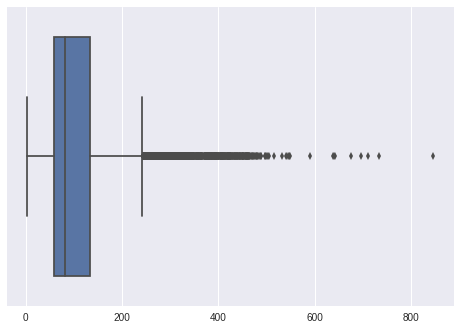

In [65]:
X_train_len = np.asarray([len(x) for x in X_train_numbers])
print "Mean ", np.mean(X_train_len) 
print "std ", np.std(X_train_len)

sns.boxplot(X_train_len)

From the plot above it follows that almost all numeric representations of reviews has less than 500 elements. So let's pad all sequences to the length of 500.

In [0]:
MAXLEN = 500
# get padded sequences
X_train_padded = nn_data_prepare.padded_set(X_train_numbers, maxlen=MAXLEN)
X_val_padded = nn_data_prepare.padded_set(X_val_numbers, maxlen=MAXLEN)
X_test_padded = nn_data_prepare.padded_set(X_test_numbers, maxlen=MAXLEN)

Create cnn model

In [67]:
cnn_model = nn_model.cnn_model()
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 499, 100)          20100     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 249, 100)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 24900)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 250)               6225250   
_________________________________________________________________
dropout_5 (Dropout)          (None, 250)               0         
__________

Fit the model

In [68]:
nn_train = NN_Train_Predict()
hist = nn_train.compile_and_fit_model(cnn_model, X_train_padded, train_labels, X_val_padded, val_labels, path_to_save=NN_MODEL_PATH["CNN_MODEL"])

Train on 17500 samples, validate on 7500 samples
Epoch 1/20
17500/17500 [==============================] - 17s 953us/step - loss: 0.4081 - binary_accuracy: 0.7890 - val_loss: 0.3443 - val_binary_accuracy: 0.8608
Epoch 2/20
17500/17500 [==============================] - 12s 658us/step - loss: 0.1932 - binary_accuracy: 0.9261 - val_loss: 0.2912 - val_binary_accuracy: 0.8861
Epoch 3/20
17500/17500 [==============================] - 12s 659us/step - loss: 0.0981 - binary_accuracy: 0.9658 - val_loss: 0.3635 - val_binary_accuracy: 0.8725
Epoch 4/20
17500/17500 [==============================] - 12s 659us/step - loss: 0.0439 - binary_accuracy: 0.9851 - val_loss: 0.5270 - val_binary_accuracy: 0.8741


Evaluate the model

In [69]:
from keras.models import load_model
cnn_model = load_model(NN_MODEL_PATH["CNN_MODEL"])
cnn_loss_val, cnn_acc_val = nn_train.model_evaluate(cnn_model, X_val_padded, val_labels)
print "Validation set. loss: ", cnn_loss_val, ", accuracy: ", cnn_acc_val 
cnn_loss_test, cnn_acc_test = nn_train.model_evaluate(cnn_model, X_test_padded, test_labels)
print "Test set. loss: ", cnn_loss_test, ", accuracy: ", cnn_acc_test 

7500/7500 [==============================] - 1s 165us/step
Validation set. loss:  0.2912138703107834 , accuracy:  0.8861333333333333
25000/25000 [==============================] - 3s 132us/step
Test set. loss:  0.3260982282781601 , accuracy:  0.8642


Calculate confusion matrix

In [0]:
# get predicted class labels
cnn_predicted_classes = nn_train.model_predict_classes(cnn_model, X_val_padded)

In [71]:
cnn_tn, cnn_fp, cnn_fn, cnn_tp = confusion_matrix(val_labels, cnn_predicted_classes.flatten()).ravel()
print cnn_tn, cnn_fp, cnn_fn, cnn_tp

3354 351 503 3292


Save result of evaluation

In [0]:
models_acc_cnn_model = pd.DataFrame({'model_name': ["cnn_model"], 
                                     'acc_on_val': cnn_acc_val, \
                                     'cross_val_score_mean_val': None, \
                                     'acc_on_test': cnn_acc_test, 
                                     'cross_val_score_mean_test': None,
                                     'TN': cnn_tn,
                                     'FP': cnn_fp,
                                     'FN': cnn_fn,
                                     'TP': cnn_tp })

In [73]:
models_acc = models_acc.append(models_acc_cnn_model)
models_acc

,FN,FP,TN,TP,acc_on_test,acc_on_val,cross_val_score_mean_test,cross_val_score_mean_val,model_name
0,360,456,3249,3435,0.87648,0.891200,0.88224,0.876933,log_regr
0,462,424,3281,3333,0.87264,0.881867,0.87508,0.882000,d2v
0,785,892,2813,3010,0.77196,0.776400,0.77148,0.780667,pol
0,444,431,3274,3351,0.87504,0.883333,NaN,NaN,dense_model
0,503,351,3354,3292,0.86420,0.886133,NaN,NaN,cnn_model


Save trained model on Google Drive

In [0]:
# authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# save model on Google drive
file_list = [NN_MODEL_PATH["CNN_MODEL"]]
upload_to_GD(file_list)

# Conclusion

The table below includes the collected info about the constructed models.

In [75]:
models_acc


,FN,FP,TN,TP,acc_on_test,acc_on_val,cross_val_score_mean_test,cross_val_score_mean_val,model_name
0,360,456,3249,3435,0.87648,0.891200,0.88224,0.876933,log_regr
0,462,424,3281,3333,0.87264,0.881867,0.87508,0.882000,d2v
0,785,892,2813,3010,0.77196,0.776400,0.77148,0.780667,pol
0,444,431,3274,3351,0.87504,0.883333,NaN,NaN,dense_model
0,503,351,3354,3292,0.86420,0.886133,NaN,NaN,cnn_model


Let's rename and rearrange the columns and reset the index.

In [76]:
models_acc = models_acc[["model_name", 'acc_on_val', 'cross_val_score_mean_val', 'TN', 'FP', 'FN', 'TP', 'acc_on_test', 'cross_val_score_mean_test']]
models_acc.rename(index=str, columns={"TN": "TN_val", "FP": "FP_val", "FN": "FN_val", "TP": "TP_val"}, inplace=True)
models_acc.reset_index(inplace=True, drop=True)
models_acc

,model_name,acc_on_val,cross_val_score_mean_val,TN_val,FP_val,FN_val,TP_val,acc_on_test,cross_val_score_mean_test
0,log_regr,0.891200,0.876933,3249,456,360,3435,0.87648,0.88224
1,d2v,0.881867,0.882000,3281,424,462,3333,0.87264,0.87508
2,pol,0.776400,0.780667,2813,892,785,3010,0.77196,0.77148
3,dense_model,0.883333,NaN,3274,431,444,3351,0.87504,NaN
4,cnn_model,0.886133,NaN,3354,351,503,3292,0.86420,NaN


The meaning of the columns in the table above is the following:

*   *model_name*:  name of the model
*   *acc_on_val*: accuracy on the validation set
*  *cross_val_score_mean_val*:  accuracy by cross validation calculated on the validation set
*   *TN_val*: number of true negatives calculated on the validation set
*   *FP_val*: number of false positives calculated on the validation set
*   *FN_val*: number of false negatives calculated on the validation set
*   *TP_val*: number of true positives calculated on the validation set
*   *acc_on_test*: accuracy on the test set
*   *cross_val_score_mean_test*: accuracy by cross validation calculated on the test set.

For neural network models "*dense_model*"  and "*cnn_model*" accuracy by cross validation has not been calculated yet and thet's why there are NaNs in the corresponding rows of the table.

"*pol*" model based on the polarity analysis from TextBlob library is the worst model and cannot be recommended for further use.

Accuracies of other four models ("*log_regr*", "*d2v*", "*dense_model*", "*cnn_model*") calculated on the both validated and test sets are very close. For "*log_regr*" and "*d2v*" models, accuracy calculated on the whole validation / test set is close to accuracy by cross validation. It follows that "*log_regr*", "*d2v*", "*dense_model*", "*cnn_model*" models are rather stable and possess similar characteristics. 

To make the final decision on the model to be recommended for use in the production, the additional analysis is required (for more details see the following section Further steps). The final decision should also take into account the cost of making a Type I and Type II errors and other requirements (model response time, model complexity, etc).



















#Further steps 

To further investigate properties of the models constructed above, the following steps are proposed:
1.   calculate accuracy by cross validation for neural network models "*dense_model*" and "*cnn_model*"
2.   analyze examples on which the models fail. It may help to improve preprocessing to avoid classification errors
3.   tune hyperparameters of neural network models (number of the hidden layers, number of neurons per layer, learning rate, etc) with e.g. *hyperopt* library
4.   check if removing stopwords really improves the model quality. It may turn out that the model constructed on data with stopwords yields better accuracy
5. check if dictionary size influence strongly the model quality.

As "*log_regr*", "*d2v*", "*dense_model*", "*cnn_model*" models work with different features generated on the basis of the raw review texts, it is reasonable to consider voting ensemble classifier based on hard or soft voting (soft voting is when class labels are predicted based on probabilities predicted by base classifiers; hard voting is a majority-based voting). The voting classifier may have significantly better accuracy in comparison with the base classifiers.

 "*dense_model*" and "*cnn_model*" neural network models are based only on 1-grams. To take into account 2- and 3-, etc-grams presented in the text, another neural network model can be created. As input, this model will take padded sequences. Each sequence consists of dictionary indexes of 1- and 2-, etc-grams that present in the text. Stated another way,  words in the initial review text is replaced with their indexes from the dictionary. The resulted sequence is extended with indexes of 2-, 3-, etc-grams from the dictionary and then padded to the predefined length. I assume that a dense network with 2-3 hidden layers can be used. 



Model analysis, ensembling and construction of the additional neural network model based on 1-, 2-, etc-grams described above require additional time and efforts and that's why are not performed here.
